Imports

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Read Data

In [10]:
file = pd.ExcelFile("../../../../data/final/Handball_09.03.2023_fertig.xlsx")

file.sheet_names

df = file.parse('3. League')

# drop last col comments & favorite corner & empy rows at end
df = df.iloc[:, :-2]
df.columns


Index(['Home team', 'Guest team', 'Matchday', 'Player 3rd league',
       'Shooter team', 'club region', 'Game Minute',
       'Difference between\nfinal whistle and kickoff \n(in seconds)',
       'Home Goal', 'Guest Goal',
       'Goalkeeper position\n(0 = on the line;\n 1 = in front of the line)',
       'Toss successful?\n(0 = no; 1 = yes;\n 2 = yes, afterthrow',
       'Left/right \nhanded?\n(1 = right; 2 = left)', 'Throw direction',
       'Pressure situation?\n(0 = no; \n1= Goalkeeper change;\n2 = last 7 meter held; 3 = goal difference < 4 + from 50. minute; 4 = 1+2; 5 = 1+3; 6 = 2+3; 7 = 1+2+3; 8 = last 7 meter successful in follow-up throw\n',
       'Number of seven meters\n(of the player)',
       'Throw quadrant last 7 meter',
       'last 7 meter successful?\n(0 = no; 1 = yes; \n2 = yes, in the afterthrow'],
      dtype='object')

Cleanup & Renaming

In [11]:
df.replace('unklar', np.nan,inplace=True)
df.replace('unklar ', np.nan,inplace=True)
df.replace('fehlend', np.nan,inplace=True)
df.replace('-', np.nan,inplace=True)
df.replace(-99, np.nan,inplace=True)
df.replace('-99', np.nan,inplace=True)
df.replace('?', np.nan,inplace=True)
df.replace('?!', np.nan,inplace=True)
#df.dropna(inplace=True)
df.columns = [ 'homeTeam','opponentTeam','day','name','team','region','playTime',
              'whistleThrowTime','homeGoals','opponentGoals',
              'goalKeeperPosition',
              'throwSuccess','LRHandy','throwDirection',
              'pressureSituation','noOfThrowsFromPlayer',
              'throwQuadrantLastThrow','lastThrowSuccess']
df = df.astype({'homeTeam':'string', 'opponentTeam':'string','day':'float16','name':'string','team':'string','region':'string','playTime':'float16',
              'whistleThrowTime':'float16','homeGoals':'float16','opponentGoals':'float16','goalKeeperPosition':'float16',
              'throwSuccess':'float16','LRHandy':'float16','throwDirection':'float16','pressureSituation':'float16','noOfThrowsFromPlayer':'float16',
              'throwQuadrantLastThrow':'float16','lastThrowSuccess':'float16', })
df

,homeTeam,opponentTeam,day,name,team,region,playTime,whistleThrowTime,homeGoals,opponentGoals,goalKeeperPosition,throwSuccess,LRHandy,throwDirection,pressureSituation,noOfThrowsFromPlayer,throwQuadrantLastThrow,lastThrowSuccess
0,TV Emsdetten,ASV Hamm-Westfalen II,1.0,<NA>,<NA>,west,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,HLZ Ahlener SG,TV Emsdetten,2.0,<NA>,<NA>,west,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,TV Emsdetten,VfL Gladbeck,3.0,HRS,TV Emsdetten,west,2.0,23.0,0.0,0.0,1.0,1.0,1.0,8.0,0.0,1.0,NaN,1.0
3,TV Emsdetten,VfL Gladbeck,3.0,HRS,TV Emsdetten,west,7.0,16.0,5.0,1.0,1.0,1.0,1.0,3.0,0.0,2.0,8.0,1.0
4,TV Emsdetten,VfL Gladbeck,3.0,HRS,TV Emsdetten,west,31.0,28.0,19.0,9.0,1.0,1.0,1.0,7.0,0.0,3.0,3.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1014,Stralsunder HV,DHK Flensborg,19.0,SKL,Stralsunder HV,north,6.0,23.0,3.0,2.0,1.0,1.0,1.0,4.0,0.0,1.0,NaN,NaN
1015,Stralsunder HV,DHK Flensborg,19.0,SKL,Stralsunder HV,north,29.0,20.0,20.0,14.0,1.0,1.0,1.0,3.0,0.0,2.0,4.0,1.0
1016,Stralsunder HV,DHK Flensborg,19.0,SKL,Stralsunder HV,north,49.0,36.0,28.0,22.0,1.0,0.0,1.0,3.0,0.0,3.0,3.0,1.0
1017,Stralsunder HV,DHK Flensborg,19.0,SKL,Stralsunder HV,north,29.0,20.0,20.0,14.0,1.0,1.0,1.0,3.0,0.0,2.0,4.0,1.0


In [12]:
df = df.loc[:,('name','throwDirection','throwSuccess')].copy()
df.dropna(inplace=True)
df['throwSuccess'].replace(2.0, 1.0,inplace=True)


plys = ['BCT', 'BERD', 'BHD' ,'BHL', 'BKRD' ]
df = df[df.name.isin(plys) == True]


#df1 =pd.crosstab(df['name'], df['throwDirection'], margins=True, margins_name="Total") 
df1 =pd.crosstab(df['name'], df['throwDirection'],margins=True, margins_name="Total") 
df1 = df1.loc[df1['Total'] >=10]
df1.index[:-1]

Index(['BERD'], dtype='object', name='name')

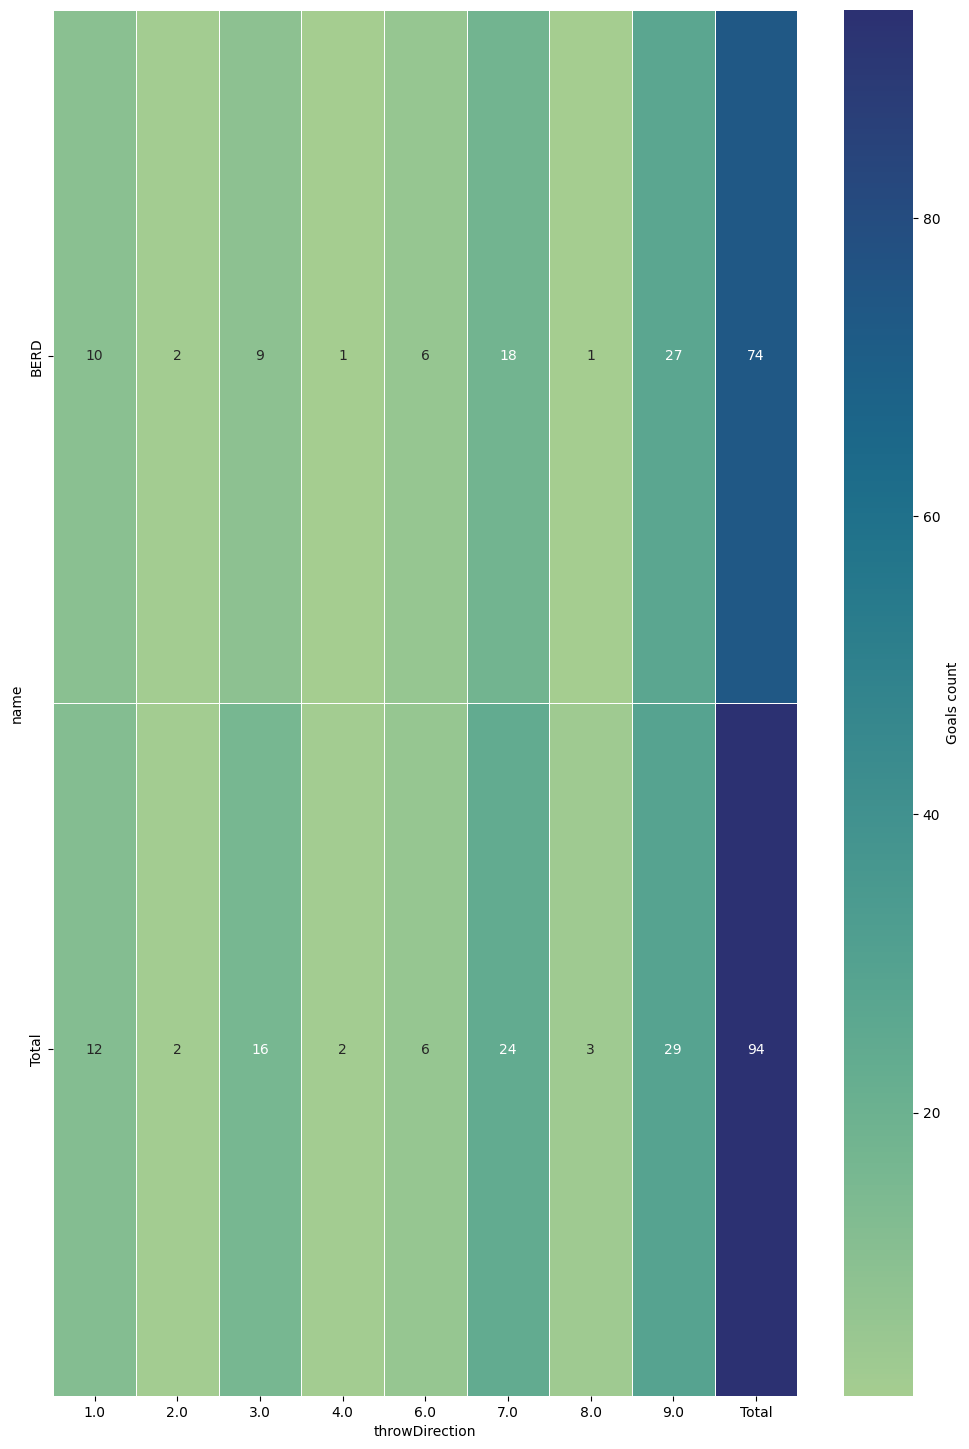

In [13]:
figab, axab = plt.subplots(figsize=(12,18)) 
sns.heatmap(df1, linewidth=0.5, ax=axab, annot=True, cmap="crest",fmt='.3g',cbar_kws={'label': 'Goals count'})
#ax.xaxis.tick_top()
plt.show()

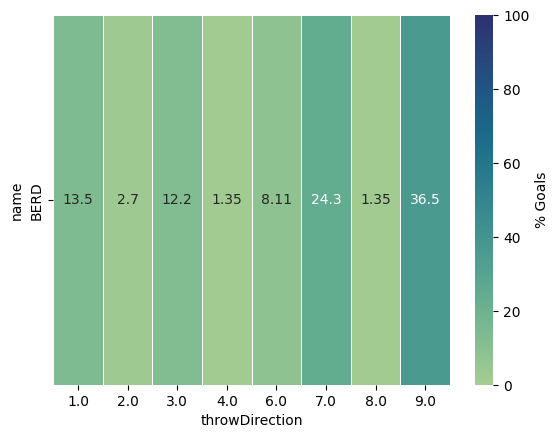

In [14]:
fig, ax = plt.subplots() 
filtered = df.loc[df['name'].isin(df1.index[:-1])]
sns.heatmap(pd.crosstab( filtered['name'], filtered['throwDirection'], normalize='index')*100, linewidth=0.5, ax=ax, annot=True, cmap="crest",vmin=0,vmax=100,fmt='.3g',cbar_kws={'label': '% Goals'})
#sns.heatmap(pd.crosstab( df['name'], df['throwDirection'], normalize='index')*100, linewidth=0.5, ax=ax, annot=True, cmap="crest",vmin=0,vmax=100,fmt='.3g',cbar_kws={'label': '% Goals'})

#ax.xaxis.tick_top()
plt.show()

In [15]:
df2 =pd.crosstab(df['name'], df['throwSuccess']) 
pd.set_option("display.max_rows", None, "display.max_columns", None)
df2

throwSuccess,0.0,1.0
name,,
BCT,1,3
BERD,16,58
BHD,0,1
BHL,4,5
BKRD,0,6


In [16]:
df3 = pd.crosstab([df['name'],df['throwDirection']], df['throwSuccess']) 
#pd.set_option("display.max_rows", None, "display.max_columns", None)
df3

throwSuccess         0.0  1.0
name throwDirection          
BCT  3.0               1    0
     4.0               0    1
     8.0               0    1
     9.0               0    1
BERD 1.0               5    5
     2.0               1    1
     3.0               2    7
     4.0               0    1
     6.0               0    6
     7.0               2   16
     8.0               0    1
     9.0               6   21
BHD  8.0               0    1
BHL  1.0               0    1
     3.0               3    2
     7.0               1    1
     9.0               0    1
BKRD 1.0               0    1
     3.0               0    1
     7.0               0    4

In [17]:
df3 = pd.crosstab([df['name'],df['throwDirection']], df['throwSuccess']) 
#pd.set_option("display.max_rows", None, "display.max_columns", None)
df3

throwSuccess         0.0  1.0
name throwDirection          
BCT  3.0               1    0
     4.0               0    1
     8.0               0    1
     9.0               0    1
BERD 1.0               5    5
     2.0               1    1
     3.0               2    7
     4.0               0    1
     6.0               0    6
     7.0               2   16
     8.0               0    1
     9.0               6   21
BHD  8.0               0    1
BHL  1.0               0    1
     3.0               3    2
     7.0               1    1
     9.0               0    1
BKRD 1.0               0    1
     3.0               0    1
     7.0               0    4

Playerwise Successfull Throw

In [18]:
dfs = df.loc[df['throwSuccess'] == 1]
dfs
dfscs =pd.crosstab(dfs['name'], dfs['throwDirection'], margins=True, margins_name="Total") 
dfscs

throwDirection,1.0,2.0,3.0,4.0,6.0,7.0,8.0,9.0,Total
name,,,,,,,,,
BCT,0,0,0,1,0,0,1,1,3
BERD,5,1,7,1,6,16,1,21,58
BHD,0,0,0,0,0,0,1,0,1
BHL,1,0,2,0,0,1,0,1,5
BKRD,1,0,1,0,0,4,0,0,6
Total,7,1,10,2,6,21,3,23,73


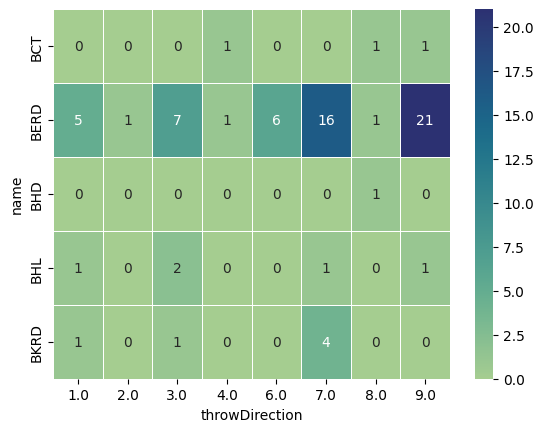

In [19]:
axs = sns.heatmap(pd.crosstab(dfs['name'], dfs['throwDirection']), linewidth=0.5, annot=True, cmap="crest")
#ax.xaxis.tick_top()
plt.show()

Playerwise Failed Throws

In [20]:
dff = df.loc[df['throwSuccess'] == 0]
dff
dffcs =pd.crosstab(dff['name'], dff['throwDirection'], margins=True, margins_name="Total") 
dffcs

throwDirection,1.0,2.0,3.0,7.0,9.0,Total
name,,,,,,
BCT,0,0,1,0,0,1
BERD,5,1,2,2,6,16
BHL,0,0,3,1,0,4
Total,5,1,6,3,6,21


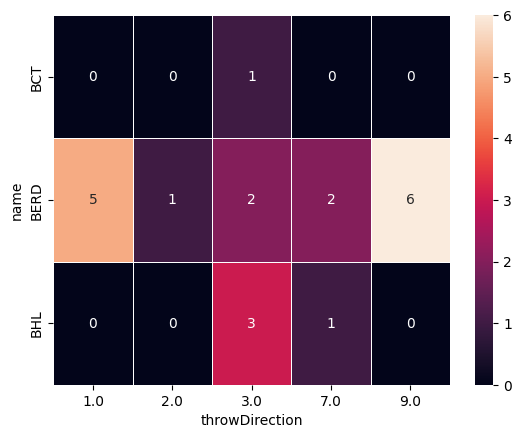

In [21]:
axf = sns.heatmap(pd.crosstab(dff['name'], dff['throwDirection']), linewidth=0.5, annot=True)
#ax.xaxis.tick_top()
plt.show()

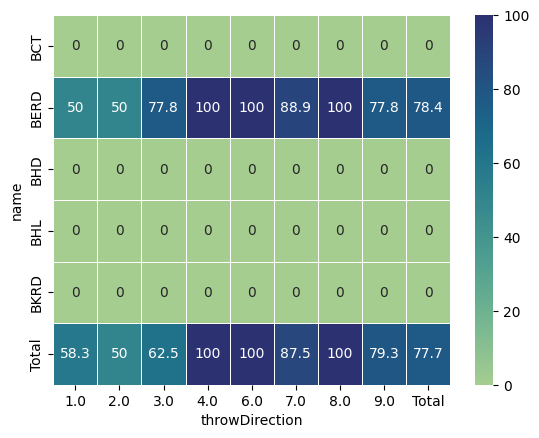

throwDirection,1.0,2.0,3.0,4.0,6.0,7.0,8.0,9.0,Total
name,,,,,,,,,
BCT,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000
BERD,50.000000,50.0,77.777778,100.0,100.0,88.888889,100.0,77.777778,78.378378
BHD,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000
BHL,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000
BKRD,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000
Total,58.333333,50.0,62.500000,100.0,100.0,87.500000,100.0,79.310345,77.659574


In [22]:
relSuccess = dfscs/df1*100
relSuccess.apply(np.floor)
relSuccess.replace(np.nan,0,inplace=True)
axrs = sns.heatmap(relSuccess, linewidth=0.5, annot=True, cmap="crest",fmt='.3g')
#ax.xaxis.tick_top()
plt.show()
relSuccess